In [3]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### First Estimation Problem
- multiple coin-flips with unknown fairness
- N repeated trials with prior belief theta = 0.5
- number_of_trial is number of time coin flips. more trials will see density shift and narrow and get closer to fairness.
- #coin flips: 0,4,10,50,500,1000 ==> #estimated tails: 0,1,6,29,255,513

<ipython-input-2-9e6a28e56612>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(len(number_of_trials)/2, 2, i+1)
<ipython-input-2-9e6a28e56612>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(len(number_of_trials)/2, 2, i+1)
<ipython-input-2-9e6a28e56612>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(len(number_of_trials)/2, 2, i+1)
<ipython-input-2-9e6a28e56612>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(len(number_of_trials)/2, 2, i+1)
<ipython-inp

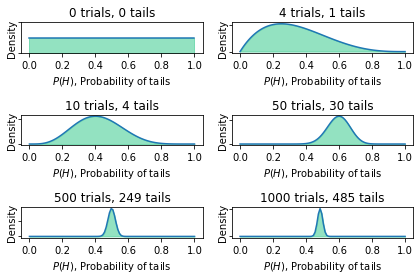

In [2]:
if __name__ == "__main__":
    number_of_trials = [0,4,10,50,500,1000]
    data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])
    x = np.linspace(0,1,100) #100 separate plotting points for x-axis
    
    for i, N in enumerate(number_of_trials):
        tails = data[:N].sum()
        
        ax = plt.subplot(len(number_of_trials)/2, 2, i+1)
        ax.set_title("%s trials, %s tails" %(N, tails))
        
        plt.xlabel("$P(H)$, Probability of tails")
        plt.ylabel('Density')
        
        if i==0:
            plt.ylim([0.0,2.0])
        plt.setp(ax.get_yticklabels(), visible=False)
        
        y = stats.beta.pdf(x, 1+tails, 1+N-tails)
        plt.plot(x,y,label='Observed %d tosses, \n %d heads' % (N, tails))
        plt.fill_between(x, 0, y, color='#29c685', alpha=0.5)
    plt.tight_layout()
    plt.show()